# Read Training results

## Python 2

In [1]:
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import pickle
import datetime

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Data structure loading
filename = './data/data_structures/DECAGON_real_reduced_DSE'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

se_mono_name2idx Imported successfully
gene2idx Imported successfully
nonzero_feat Imported successfully
edge_type2dim Imported successfully
adj_mats_orig Imported successfully
edge_type2decoder Imported successfully
se_combo_name2idx Imported successfully
drug2idx Imported successfully
degrees Imported successfully
edge_types Imported successfully
num_edge_types Imported successfully
num_feat Imported successfully
feat Imported successfully


In [4]:
c = np.zeros([len(adj_mats_orig[1,1])])
for i in range(len(c)):
    c[i] = np.sum(adj_mats_orig[1,1][i])
c

array([48534., 38464., 35664., 34816., 32378., 31696., 48534., 38464.,
       35664., 34816., 32378., 31696.])

In [5]:
names = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']

In [26]:
filenames = ['reduced','reduced_DSE','reduced_DSE_PF','reduced_DSE_NPF','reduced_DSE_PF_BDM'
            ,'reduced_DSE_NPF_BDM']
titles = ['No Features','DSE','DSE + PF','DSE+NPF','BDM + PF','BDM + NPF']

In [6]:
# Results loading
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

train_cost Imported successfully
val_auc Imported successfully
val_apk Imported successfully
step_time Imported successfully
val_auprc Imported successfully
time Imported successfully
vms Imported successfully
rss Imported successfully


In [7]:
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

Total Time: 15:04:18.064114
Virtual Memory: 98.463932416 Gb
RSS Memory: 1.180909568 Gb


In [66]:
n_files = len(titles)
idx = [0,2,4,5,6,7,8,9]
data_AUROC = np.zeros([len(idx),72,n_files])
data_AUPRC = np.zeros([len(idx),72,n_files])
for i in range(n_files):
    filename = './results_training/TRAIN_real_' + filenames[i] + '_epochs20_h164_h232_lr0.001dropout0.1'
    f = open(filename, 'rb')
    DS = pickle.load(f)
    for j in range(len(idx)):
        val_auc = DS['val_auc']
        val_auprc = DS['val_auprc']
        data_AUROC[j,:,i] = val_auc[idx[j],:]
        data_AUPRC[j,:,i] = val_auprc[idx[j],:]
    f.close()

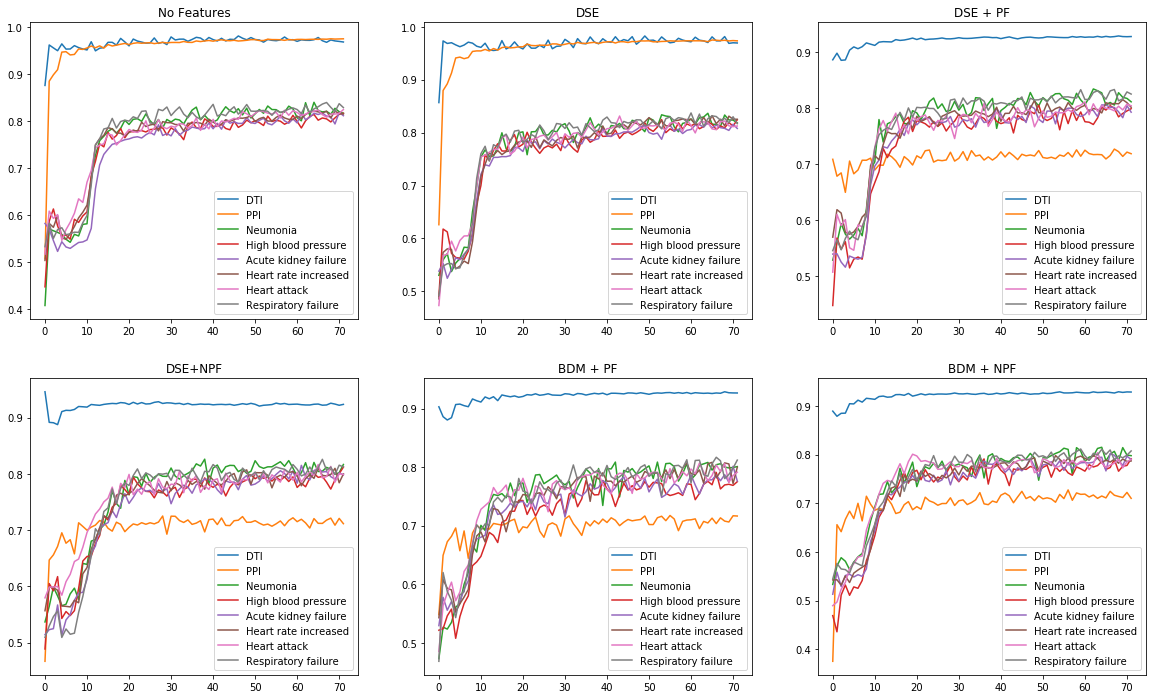

In [67]:
figure(figsize(20,12))
for i in range(n_files):
    subplot(2,3,i+1)
    for j in range(len(idx)):
        plot(data_AUROC[j,:,i],label=names[idx[j]])
    title(titles[i])
    legend()
show()

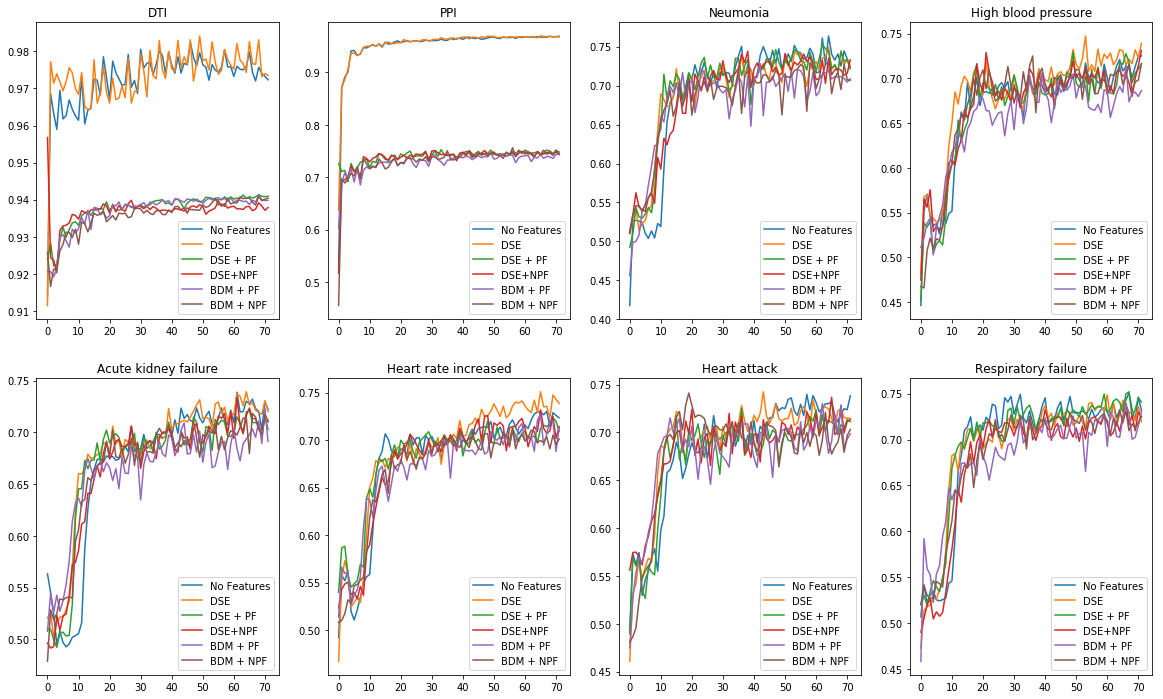

In [69]:
figure(figsize(20,12))
for i in range(len(idx)):
    subplot(2,4,i+1)
    for j in range(n_files):
        plot(data_AUPRC[i,:,j],label=titles[j])
    title(names[idx[i]])
    legend()
show()

# Final performance for all networks

In [8]:
apk_red_BDM_NPF = pd.read_csv('results_training/apk_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
apk_red_BDM_PF = pd.read_csv('results_training/apk_red_BDM_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_NPF = pd.read_csv('results_training/apk_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_PF = pd.read_csv('results_training/apk_red_DSE_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE = pd.read_csv('results_training/apk_red_DSE.txt',header=None).to_numpy().squeeze()
apk_red = pd.read_csv('results_training/apk_red.txt',header=None).to_numpy().squeeze()
apk = np.stack([apk_red,apk_red_DSE,apk_red_DSE_PF,apk_red_DSE_NPF,apk_red_BDM_PF,
                apk_red_BDM_NPF]).reshape(6,16,1)


In [9]:
auroc_red_BDM_NPF = pd.read_csv('results_training/auroc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_BDM_PF = pd.read_csv('results_training/auroc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_NPF = pd.read_csv('results_training/auroc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_PF = pd.read_csv('results_training/auroc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE = pd.read_csv('results_training/auroc_red_DSE.txt',header=None).to_numpy().squeeze()
auroc_red = pd.read_csv('results_training/auroc_red.txt',header=None).to_numpy().squeeze()
auroc = np.stack([auroc_red,auroc_red_DSE,auroc_red_DSE_PF,auroc_red_DSE_NPF,
                  auroc_red_BDM_PF,auroc_red_BDM_NPF]).reshape(6,16,1)


In [10]:
auprc_red_BDM_NPF = pd.read_csv('results_training/auprc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_BDM_PF = pd.read_csv('results_training/auprc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_NPF = pd.read_csv('results_training/auprc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_PF = pd.read_csv('results_training/auprc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE = pd.read_csv('results_training/auprc_red_DSE.txt',header=None).to_numpy().squeeze()
auprc_red = pd.read_csv('results_training/auprc_red.txt',header=None).to_numpy().squeeze()
auprc = np.stack([auprc_red,auprc_red_DSE,auprc_red_DSE_PF,auprc_red_DSE_NPF,
                  auprc_red_BDM_PF,auprc_red_BDM_NPF]).reshape(6,16,1)

In [11]:
final_metrics = np.concatenate([auroc,auprc,apk],axis=2)

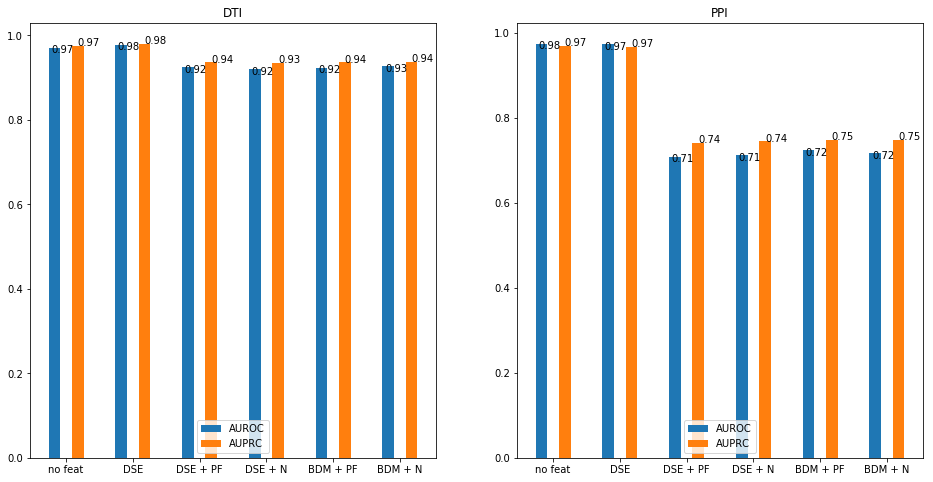

In [17]:
figure(figsize=[16,8])
labels = ['no feat', 'DSE', 'DSE + PF', 'DSE + N', 'BDM + PF' , 'BDM + N']
idx2=[4,5,6,7,8,9]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
cont=1
for i in [0,2]:
    a = final_metrics[:,i,0]
    b = final_metrics[:,i,1]
    ax = subplot(1,2,cont)
    bar(x - width/2, a , width/2, label='AUROC')
    bar(x + width/2, b, width/2, label='AUPRC')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    xticks(x, labels)
    title(names[i])
    legend(loc='lower center')
    eps = 0.05
    cont+=1
    for j in range(len(a)):
        text(x[j] - width/2-eps, a[j]-eps/4, str(round(a[j],2)))#, color='blue', fontweight='bold')
        text(x[j]+width/2, b[j], str(round(b[j],2)))#, color='blue', fontweight='bold')
    
show()